<a href="https://colab.research.google.com/github/equador8078/Blogify/blob/main/EMA_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
<ipython-input-23-595b1f42957e>:54: RuntimeWarning: invalid value encountered in divide
  rs = avg_gain / avg_loss


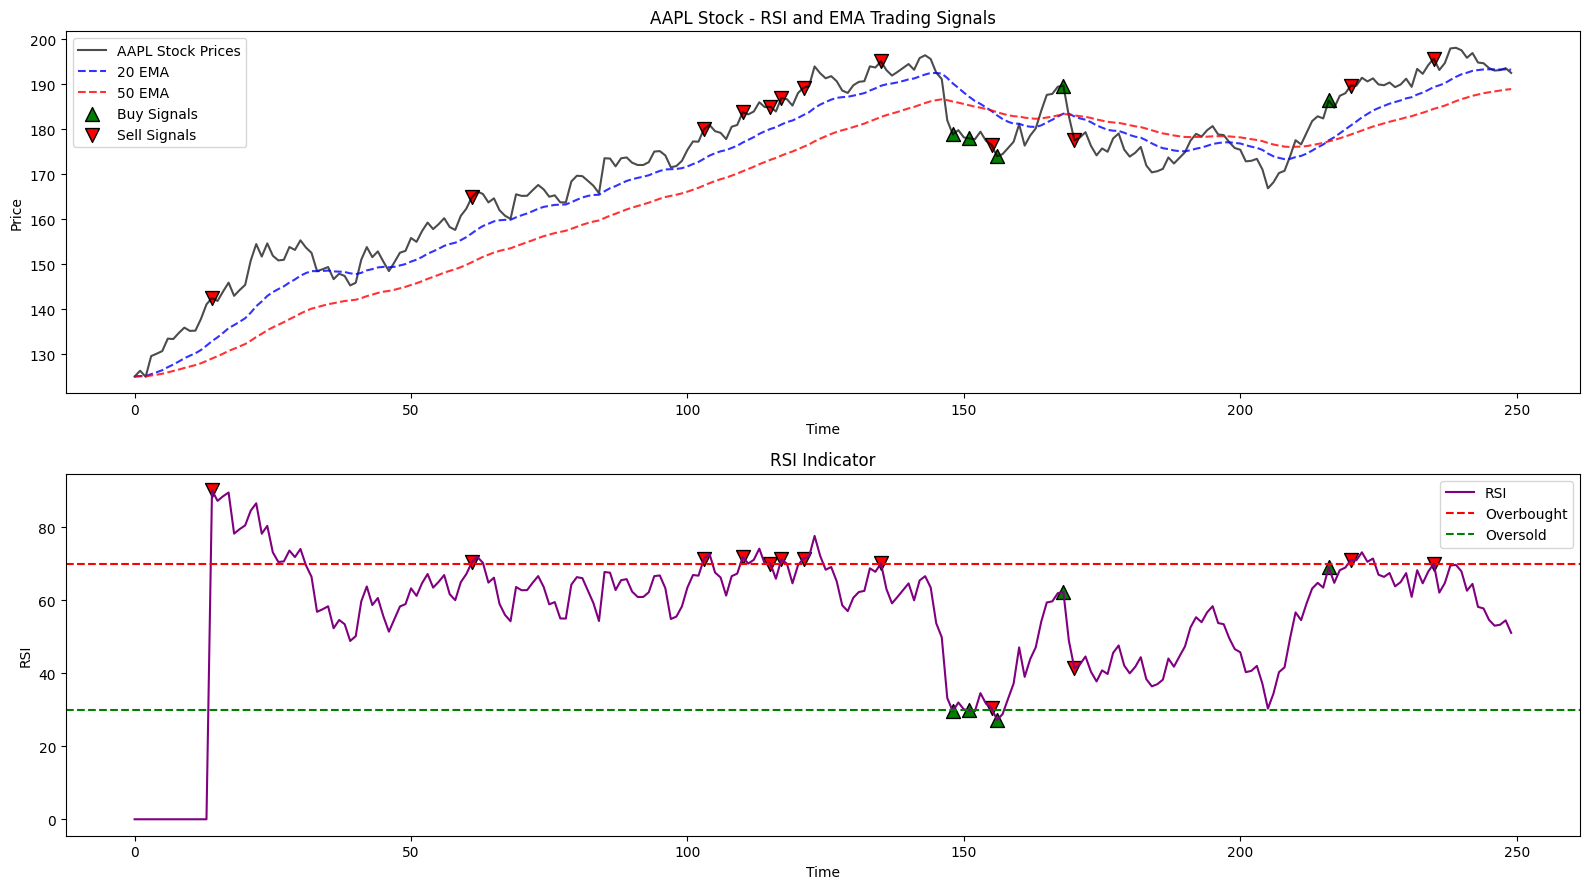


Detailed Trading Signals:
Type: SELL | Price: $142.53 | RSI: 90.12 | RSI Overbought: Yes
Type: SELL | Price: $164.90 | RSI: 70.39 | RSI Overbought: Yes
Type: SELL | Price: $180.09 | RSI: 71.41 | RSI Overbought: Yes
Type: SELL | Price: $183.79 | RSI: 71.81 | RSI Overbought: Yes
Type: SELL | Price: $185.01 | RSI: 70.06 | RSI Overbought: Yes
Type: SELL | Price: $187.00 | RSI: 71.23 | RSI Overbought: Yes
Type: SELL | Price: $189.25 | RSI: 71.43 | RSI Overbought: Yes
Type: SELL | Price: $195.10 | RSI: 70.13 | RSI Overbought: Yes
Type: BUY | Price: $178.85 | RSI: 29.56 | RSI Oversold: Yes
Type: BUY | Price: $177.97 | RSI: 29.84 | RSI Oversold: Yes
Type: SELL | Price: $176.57 | RSI: 30.47 | EMA Crossover: Yes
Type: BUY | Price: $174.00 | RSI: 27.23 | RSI Oversold: Yes
Type: BUY | Price: $189.70 | RSI: 62.29 | EMA Crossover: Yes
Type: SELL | Price: $177.56 | RSI: 41.33 | EMA Crossover: Yes
Type: BUY | Price: $186.40 | RSI: 69.00 | EMA Crossover: Yes
Type: SELL | Price: $189.71 | RSI: 71.03 | 

([178.85000610351562,
  177.97000122070312,
  174.0,
  189.6999969482422,
  186.39999389648438],
 [148, 151, 156, 168, 216],
 [142.52999877929688,
  164.89999389648438,
  180.08999633789062,
  183.7899932861328,
  185.00999450683594,
  187.0,
  189.25,
  195.10000610351562,
  176.57000732421875,
  177.55999755859375,
  189.7100067138672,
  195.7100067138672],
 [14, 61, 103, 110, 115, 117, 121, 135, 155, 170, 220, 235],
 [{'type': 'sell',
   'index': 14,
   'price': 142.52999877929688,
   'rsi': 90.1194792518005,
   'ema_crossover': False,
   'rsi_overbought': True},
  {'type': 'sell',
   'index': 61,
   'price': 164.89999389648438,
   'rsi': 70.38639625160508,
   'ema_crossover': False,
   'rsi_overbought': True},
  {'type': 'sell',
   'index': 103,
   'price': 180.08999633789062,
   'rsi': 71.41434430793969,
   'ema_crossover': False,
   'rsi_overbought': True},
  {'type': 'sell',
   'index': 110,
   'price': 183.7899932861328,
   'rsi': 71.81157236360255,
   'ema_crossover': False,
 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yfn
import pandas as pd

def calculate_ema(prices, period):
    """
    Calculate Exponential Moving Average

    Args:
    prices (np.array): Price series
    period (int): EMA period

    Returns:
    np.array: EMA values
    """
    ema = pd.Series(prices).ewm(span=period, adjust=False).mean()
    return np.array(ema)

def calculate_rsi(prices, period=14):
    """
    Calculate Relative Strength Index (RSI) using pure numpy/pandas

    Args:
    prices (np.array): Price series
    period (int): RSI period

    Returns:
    np.array: RSI values
    """
    # Calculate price changes
    delta = np.diff(prices)

    # Create arrays of gains and losses
    gains = delta.copy()
    losses = delta.copy()
    gains[gains < 0] = 0
    losses[losses > 0] = 0

    # Calculate average gains and losses over the period
    avg_gain = np.zeros_like(prices)
    avg_loss = np.zeros_like(prices)

    # First average
    avg_gain[period] = np.mean(gains[:period])
    avg_loss[period] = np.mean(np.abs(losses[:period]))

    # Subsequent averages using exponential smoothing
    for i in range(period+1, len(prices)):
        avg_gain[i] = (avg_gain[i-1] * (period-1) + gains[i-1]) / period
        avg_loss[i] = (avg_loss[i-1] * (period-1) + np.abs(losses[i-1])) / period

    # Calculate relative strength
    rs = avg_gain / avg_loss

    # Calculate RSI
    rsi = np.zeros_like(prices)
    rsi[period:] = 100.0 - (100.0 / (1.0 + rs[period:]))

    return rsi

def generate_trading_signals(prices, ema_20, ema_50, rsi, rsi_upper=70, rsi_lower=30):
    """
    Generate trading signals based on RSI and EMA

    Args:
    prices (np.array): Price series
    ema_20 (np.array): 20-period EMA
    ema_50 (np.array): 50-period EMA
    rsi (np.array): RSI values
    rsi_upper (float): Upper RSI threshold for overbought
    rsi_lower (float): Lower RSI threshold for oversold

    Returns:
    tuple: Buy points, buy indices, sell points, sell indices, combined signals
    """
    buy_points = []
    buy_indices = []
    sell_points = []
    sell_indices = []
    combined_signals = []

    for i in range(1, len(prices)):
        # Skip early indices where RSI is not calculated
        if i < 14:
            continue

        # EMA Crossover Conditions
        ema_crossover_buy = (ema_20[i] > ema_50[i]) and (ema_20[i-1] <= ema_50[i-1])
        ema_crossover_sell = (ema_20[i] < ema_50[i]) and (ema_20[i-1] >= ema_50[i-1])

        # RSI Conditions
        rsi_oversold = rsi[i] <= rsi_lower and rsi[i-1] > rsi_lower
        rsi_overbought = rsi[i] >= rsi_upper and rsi[i-1] < rsi_upper

        # Buy Signals: RSI Oversold OR EMA Crossover
        if rsi_oversold or ema_crossover_buy:
            buy_points.append(prices[i])
            buy_indices.append(i)
            combined_signals.append({
                'type': 'buy',
                'index': i,
                'price': prices[i],
                'rsi': rsi[i],
                'ema_crossover': ema_crossover_buy,
                'rsi_oversold': rsi_oversold
            })

        # Sell Signals: RSI Overbought OR EMA Crossover
        if rsi_overbought or ema_crossover_sell:
            sell_points.append(prices[i])
            sell_indices.append(i)
            combined_signals.append({
                'type': 'sell',
                'index': i,
                'price': prices[i],
                'rsi': rsi[i],
                'ema_crossover': ema_crossover_sell,
                'rsi_overbought': rsi_overbought
            })

    return buy_points, buy_indices, sell_points, sell_indices, combined_signals

def analyze_stock_data(ticker, start_date, end_date, rsi_upper=70, rsi_lower=30):
    """
    Comprehensive stock data analysis function with RSI and EMA strategy
    """
    # Fetch stock data
    stock_data = yfn.download(ticker, start=start_date, end=end_date)
    stock_data = stock_data['Close'].dropna()

    # Convert to numpy array
    prices = np.array(stock_data.values, dtype=np.double).flatten(order='C')

    # Calculate EMAs
    ema_20 = calculate_ema(prices, 20)
    ema_50 = calculate_ema(prices, 50)

    # Calculate RSI
    rsi = calculate_rsi(prices)

    # Get trading signals and details
    buy_points, buy_indices, sell_points, sell_indices, combined_signals = generate_trading_signals(
        prices, ema_20, ema_50, rsi, rsi_upper, rsi_lower
    )

    # Visualization with controlled figure size
    plt.figure(figsize=(16, 9), dpi=100)
    plt.subplot(2, 1, 1)
    plt.plot(prices, label=f'{ticker} Stock Prices', alpha=0.7, color='black')

    # Plot EMA Lines
    plt.plot(ema_20, label='20 EMA', color='blue', linestyle='--', alpha=0.8)
    plt.plot(ema_50, label='50 EMA', color='red', linestyle='--', alpha=0.8)

    # Plot Signals
    plt.scatter(buy_indices, buy_points, color='green', label='Buy Signals',
                marker='^', s=100, edgecolors='black')
    plt.scatter(sell_indices, sell_points, color='red', label='Sell Signals',
                marker='v', s=100, edgecolors='black')

    plt.title(f'{ticker} Stock - RSI and EMA Trading Signals')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

    # RSI Subplot
    plt.subplot(2, 1, 2)
    plt.plot(rsi, label='RSI', color='purple')
    plt.axhline(y=rsi_upper, color='r', linestyle='--', label='Overbought')
    plt.axhline(y=rsi_lower, color='g', linestyle='--', label='Oversold')

    # Mark buy and sell points on RSI chart
    plt.scatter(buy_indices, [rsi[i] for i in buy_indices], color='green',
                marker='^', s=100, edgecolors='black')
    plt.scatter(sell_indices, [rsi[i] for i in sell_indices], color='red',
                marker='v', s=100, edgecolors='black')

    plt.title('RSI Indicator')
    plt.xlabel('Time')
    plt.ylabel('RSI')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print Detailed Signal Information
    print("\nDetailed Trading Signals:")
    for signal in combined_signals:
        signal_details = [
            f"Type: {signal['type'].upper()}",
            f"Price: ${signal['price']:.2f}",
            f"RSI: {signal['rsi']:.2f}"
        ]

        if signal['type'] == 'buy':
            if signal.get('ema_crossover'):
                signal_details.append("EMA Crossover: Yes")
            if signal.get('rsi_oversold'):
                signal_details.append("RSI Oversold: Yes")
        else:
            if signal.get('ema_crossover'):
                signal_details.append("EMA Crossover: Yes")
            if signal.get('rsi_overbought'):
                signal_details.append("RSI Overbought: Yes")

        print(" | ".join(signal_details))

    return buy_points, buy_indices, sell_points, sell_indices, combined_signals

# Example usage for analysis
analyze_stock_data('AAPL', '2023-01-01', '2023-12-31')